<div align=center>

# Handwritten Digit Classification

By Hamed Araab

Supervisor: Dr. Marzieh Zarinbal

</div>


## Description

In this mini-project, you are given the MNIST dataset which contains `28×28`
black-and-white images of handwritten digits. The train and test splits contain
`60,000` and `10,000` images, respectively.

You are asked to develop and train a deep neural network (DNN) to tackle this
task using the implementation that you learned earlier. Remember to choose the
hyperparameters of your model, especially the activation and loss functions,
according to the type of the challenge you are facing.


## Setup

First of all, set up the environment.


In [1]:
%run ../implementation.ipynb

In [2]:
import matplotlib.pyplot as plt

from pandas import read_csv, get_dummies
from sklearn.preprocessing import MinMaxScaler

In [3]:
np.set_printoptions(formatter={"float": lambda x: "{:.2f}".format(x)})

## Dataset

Load the train and test splits using `read_csv`.


In [4]:
# Q1 - 10 Points

df_train = None  # YOUR CODE HERE
df_test = None  # YOUR CODE HERE

You can see that each row represents an image. The first column is the label of
the image and the rest are the brightness values for each of the 784 pixels, `0`
being black and `255` being white.


In [5]:
df_train

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Data Preprocessing

You must change the data in various ways before feeding it to a neural network
since it's not suitable at the current stage.


### One-Hot Encoding on "label"

Since this is a classification problem, the output for each sample must be a
binary vector. So, you must perform a process called "one-hot encoding" so that
categorical variables, in this case the "label" column, are represented as
binary vectors. In pandas, you can use the `get_dummies` function to perform
one-hot encoding on categorical columns in a `DataFrame`.


In [6]:
# Q2 - 20 Points

df_train = None  # YOUR CODE HERE
df_test = None  # YOUR CODE HERE

df_train

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,label_0,label_1,label_2,label_3,label_4,label_5,label_6,label_7,label_8,label_9
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### Extracting the `X` and `Y` Matrices

Now, you can extract `X_train`, `Y_train`, `X_test`, and `Y_test` the main data
frames.

_Hint:_ First, transpose the data frames and then select the appropriate rows
for each of the variables.


In [7]:
# Q3 - 20 Points

X_train, Y_train = None, None  # YOUR CODE HERE
X_test, Y_test = None, None  # YOUR CODE HERE

Let's check out `X_train` and `Y_train`, just to make sure.


In [8]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,59990,59991,59992,59993,59994,59995,59996,59997,59998,59999
1x1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1x2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1x3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1x4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1x5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28x24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28x25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28x26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28x27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
Y_train

,0,1,2,3,4,5,6,7,8,9,...,59990,59991,59992,59993,59994,59995,59996,59997,59998,59999
label_0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
label_1,0,0,0,1,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
label_2,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
label_3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
label_4,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
label_5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
label_6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
label_7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
label_8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
label_9,0,0,0,0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0


### Transforming Data Frames into Arrays

Now, you should transform the extracted datasets from data frames into arrays
using the `.to_numpy()` method.


In [10]:
# Q4 - 10 Points

X_train, Y_train = None, None  # YOUR CODE HERE
X_test, Y_test = None, None  # YOUR CODE HERE

### Normalizing the Input Matrices

The pixel brightness values range from `0` to `255`. It's better to normalize
these numbers and scale them down so that your DNN won't have to deal with large
numbers.


In [11]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Data Visualization

To get an idea of how the images look like, you can see some of them with their
labels below.


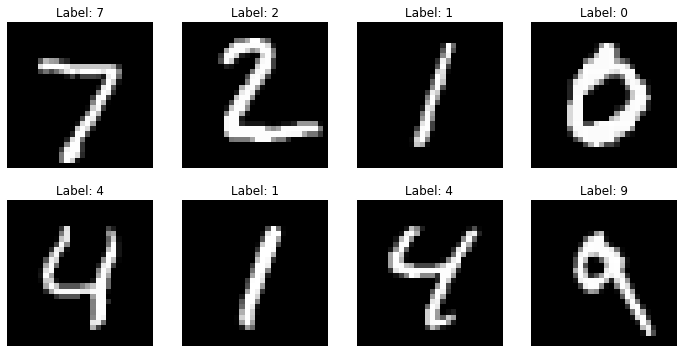

In [12]:
sample_images = X_test[:, :8].reshape(28, 28, 8)
sample_labels = Y_test[:, :8]

plt.figure(figsize=(12, 6))

for i in range(sample_images.shape[2]):
    plt.subplot(2, 4, i + 1)
    plt.imshow(sample_images[:, :, i], cmap="gray")
    plt.title(f"Label: {sample_labels[:, i].argmax(axis=0)}")
    plt.axis("off")

plt.show()

## DNN Development

Now that you have prepared your data to be fed to a DNN, you can declare your
model with the hyperparameters of your choice.


In [ ]:
# Q5 - 40 Points

np.random.seed(1)

model = NeuralNetwork(
    input_size=None,  # YOUR CODE HERE
    layers=[
        # YOUR CODE HERE
    ],
    loss_function=None,  # YOUR CODE HERE
    learning_rate=None,  # YOUR CODE HERE
)

model.train(
    X_train,
    Y_train,
    X_test,
    Y_test,
    epochs=None,  # YOUR CODE HERE
    batch_size=None,  # YOUR CODE HERE
)

Let's see what is your model's predictions for the images we sampled earlier.


In [ ]:
Y_sample_hat = model.predict(sample_images.reshape(784, 8))
sample_predict_labels = Y_sample_hat.argmax(axis=0)

print(f"Predicted Labels: {sample_predict_labels}")
print(f"\nPrediction Matrix:\n{Y_sample_hat}")